<AxesSubplot:xlabel='datetime'>

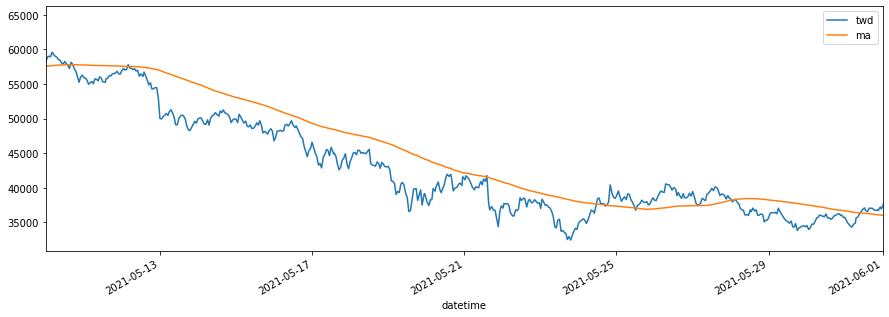

In [3]:
import requests
import pandas as pd

def get_price(url):
    res = requests.get(url)
    data_prices = res.json()['stats']
    df = pd.DataFrame(data_prices)
    df.columns = ['datetime','twd']
    df['datetime']=pd.to_datetime(df['datetime'],unit='ms')
    df.index=df['datetime']
    return df


url = 'https://www.coingecko.com/price_charts/1/usd/90_days.json'


bitcoin =get_price(url)
bitcoin['ma']=bitcoin['twd'].rolling(window=100).mean()
bitcoin[['twd','ma']].plot(kind = 'line',figsize=[15,5],xlim=('2021-05-10','2021-06-01'))